In [14]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
sns.set()

# ***Fitting and predicting***

In [1]:
import sklearn.datasets

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target
print(X.shape)
print(y.shape)

(11314, 130107)
(11314,)


In [2]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)

# ***Model Evaluation***

In [3]:
knn.score(X,y)

0.9999116139296447

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6896429833863557

### ***KNN classification***

In this exercise you'll explore a subset of the [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/). The variables `X_train`, `X_test`, `y_train`, and `y_test` are already loaded into the environment. The `X` variables contain features based on the words in the movie reviews, and the `y` variables contain labels for whether the review sentiment is positive (+1) or negative (-1).

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [scikit-learn Cheat Sheet](http://datacamp-community-prod.s3.amazonaws.com/eb807da5-dce5-4b97-a54d-74e89f14266b) and keep it handy!


## *ข้อมูลต้นฉบับน่าจะใหญ่มาก (ขนาดที่อาจโหลดไปแบบฟรี ไม่ขึ้น) และมันเอามาแค่สับเซต (ไหนก็ไม่รู้) จึงไม่จำลองข้อมูลขึ้นมาใหม่ในคอร์สนี้ละกัน*

* Create a KNN model with default hyperparameters.
* Fit the model.
* Print out the prediction for the test example 0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test[0])
print("Prediction for test example 0:", pred)



```
Prediction for test example 0: [1.]
```
# ***Comparing models***

Compare k nearest neighbors classifiers with `k=1` and `k=5` on the handwritten digits data set, which is already loaded into the variables `X_train`, `y_train`, `X_test`, and `y_test`. You can set `k` with the **`n_neighbors`** parameter when creating the **`KNeighborsClassifier`** object.

Which model has a higher test accuracy?



```
k = 5
```



# ***Using `LogisticRegression`***

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_test, y_test)

# ***LogisticRegression example***



In [7]:
from sklearn.linear_model import LogisticRegression
import sklearn.datasets

wine = sklearn.datasets.load_wine()

lr = LogisticRegression(max_iter=100000)
lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)

0.9943820224719101

## ***Logistic Regression ใน sklearn ทำ multinomial ได้อยู่แล้ว***

* สังเกตจาก ตัวแปรตามสิ มีสามค่า 0, 1, 2

In [24]:
print(len(wine.target))
wine.target

178


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

* จะเห็นว่า **`.predict_proba()` จะคำนวณความน่าจะเป็นของผลลัพธ์ที่จะเกิด

  * ส่วนแรกๆ ก็สอดคล้องกับไวน์ประเภทที่ 0
  * ส่วนกลางๆ ก็สอดคล้องกับไวน์ประเภทที่ 1 
  * ส่วนท้ายๆ ก็สอดคล้องกับไวน์ประเภทที่ 2

* ในแต่ละแถว รวมค่าความน่าจะเป็นของการพยากรณ์ต้องเท่ากับ 1

In [31]:
print(len(lr.predict_proba(wine.data)))
print(lr.predict_proba(wine.data[:3]))
print(lr.predict_proba(wine.data[70:73]))
print(lr.predict_proba(wine.data[176:]))

178
[[9.99810852e-01 2.35959665e-05 1.65552024e-04]
 [9.99691768e-01 2.36082247e-04 7.21497576e-05]
 [9.99919808e-01 1.50578719e-05 6.51341667e-05]]
[[3.52996530e-02 7.63609774e-01 2.01090573e-01]
 [2.49169879e-04 9.99676195e-01 7.46354426e-05]
 [4.45768259e-04 9.94459625e-01 5.09460722e-03]]
[[1.55736037e-03 1.14867172e-06 9.98441491e-01]
 [3.69163124e-04 4.04855333e-06 9.99626788e-01]]


# ***Using `LinearSVC`***

In [5]:
from sklearn.svm import LinearSVC
import sklearn.datasets

wine = sklearn.datasets.load_wine()

svm = LinearSVC() # มีปัญหาการลู่เข้า เพิ่ม max_iter ไปเยอะๆแล้วก็ยังไม่ลู่เข้า
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.949438202247191

In [6]:
from sklearn.svm import SVC
import sklearn.datasets
wine = sklearn.datasets.load_wine()

svm = SVC() # default hyperparameters
svm.fit(wine.data, wine.target);
svm.score(wine.data, wine.target)

0.7078651685393258

* **Underfitting**: model is too simple, low training accuracy
* **Overfitting**: model is too complex, low test accuracy

### ***Running LogisticRegression and SVC***

Apply logistic regression and a support vector machine to classify images of handwritten digits.

* Apply logistic regression and SVM (using **`SVC()`**) to the handwritten digits data set using the provided train/validation split.

* For each classifier, print out the training and validation accuracy.

In [9]:
from re import M
from sklearn import datasets

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(max_iter=9999)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("\n\n")

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.96



0.9970304380103935
0.9822222222222222


### ***Sentiment analysis for movie reviews***

In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

The variables `X` and `y` are already loaded into the environment. `X` contains features based on the number of times words appear in the movie reviews, and `y` contains labels for whether the review sentiment is positive (+1) or negative (-1).

* Train a logistic regression model on the movie review data.
* Predict the probabilities of negative vs. positive for the two given reviews.
* Feel free to write your own reviews and get probabilities for those too!

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

def get_features(review):
    return vectorizer.transform([review])

review1 = "LOVED IT! This movie was amazing. Top 10 this year."
vectorizer.fit_transform([review1])
print(vectorizer.get_feature_names_out())

vectorizer.fit([review1])
review1_features = get_features(review1)
print(review1_features.toarray())


['10' 'amazing' 'it' 'loved' 'movie' 'this' 'top' 'was' 'year']
[[1 1 1 1 1 2 1 1 1]]


* "This" โผล่มา 2 ครั้ง จึงมีเลข 2

In [ ]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])



```
    Review: LOVED IT! This movie was amazing. Top 10 this year.
    Probability of positive review: 0.8079007873616059
    Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
    Probability of positive review: 0.5855117402793947
```
The second probability would have been even lower, but the word "good" trips it up a bit, since that's considered a "positive" word.

### ***Visualizing decision boundaries***

In this exercise, you'll visualize the decision boundaries of various classifier types.

A subset of scikit-learn's built-in wine dataset is already loaded into `X`, along with binary labels in `y`.

* Create the following classifier objects with default hyperparameters: **`LogisticRegression`, **`LinearSVC`**, **`SVC`**, **`KNeighborsClassifier`**.

* Fit each of the classifiers on the provided data using a **`for`** loop.

* Call the `plot_4_classifers()` function (similar to the code [here](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)), passing in `X`, `y`, and a list containing the four classifiers.


In [37]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

X = np.array([[11.45,  2.4 ],       [13.62,  4.95],       [13.88,  1.89],       [12.42,  2.55],       [12.81,  2.31],       [12.58,  1.29],       [13.83,  1.57],       [13.07,  1.5 ],       [12.7 ,  3.55],       [13.77,  1.9 ],       [12.84,  2.96],       [12.37,  1.63],       [13.51,  1.8 ],       [13.87,  1.9 ],       [12.08,  1.39],       [13.58,  1.66],       [13.08,  3.9 ],       [11.79,  2.13],       [12.45,  3.03],       [13.68,  1.83],       [13.52,  3.17],       [13.5 ,  3.12],       [12.87,  4.61],       [14.02,  1.68],       [12.29,  3.17],       [12.08,  1.13],       [12.7 ,  3.87],       [11.03,  1.51],       [13.32,  3.24],       [14.13,  4.1 ],       [13.49,  1.66],       [11.84,  2.89],       [13.05,  2.05],       [12.72,  1.81],       [12.82,  3.37],       [13.4 ,  4.6 ],       [14.22,  3.99],       [13.72,  1.43],       [12.93,  2.81],       [11.64,  2.06],       [12.29,  1.61],       [11.65,  1.67],       [13.28,  1.64],       [12.93,  3.8 ],       [13.86,  1.35],       [11.82,  1.72],       [12.37,  1.17],       [12.42,  1.61],       [13.9 ,  1.68],       [14.16,  2.51]])
y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True])

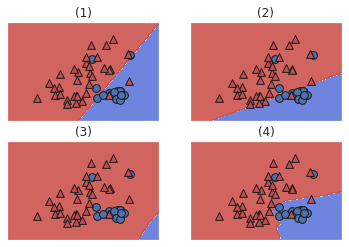

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(max_iter=100000), LinearSVC(max_iter=100000), SVC(max_iter=100000), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

As you can see, logistic regression and linear SVM are linear classifiers whereas the default SVM and KNN are not.

### ***Changing the model coefficients***

When you call **`fit`** with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with **`fit`**), and visualize the resulting classifiers.

A 2D dataset is already loaded into the environment as `X` and `y`, along with a linear classifier object model.

* Set the two coefficients and the intercept to various values and observe the resulting decision boundaries.

* Try to build up a sense of how the coefficients relate to the decision boundary.

* Set the coefficients and intercept such that the model makes no errors on the given training data.



In [ ]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

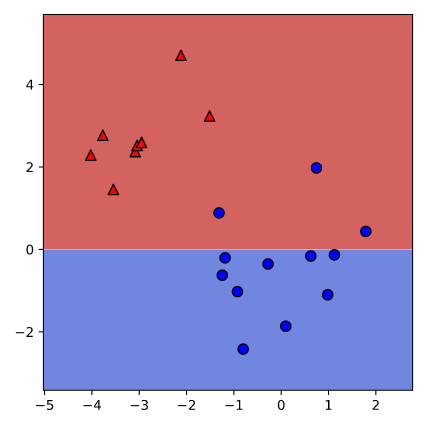

In [ ]:
# Set the coefficients
model.coef_ = np.array([[-1,1]])
model.intercept_ = np.array([-4])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

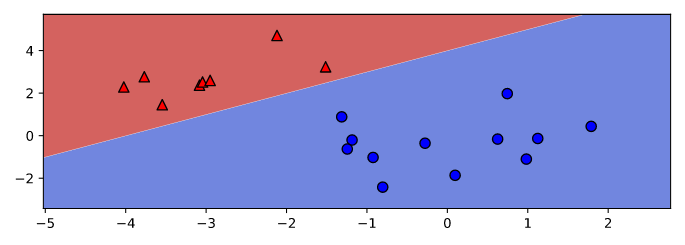

* The coefficients determine the slope of the boundary.
* The intercept shifts the boundary.

### ***The 0-1 loss***

In the figure below, what is the 0-1 loss (number of classification errors) of the classifier?

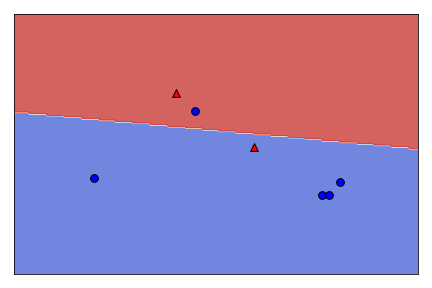

There is 1 misclassified red point and 1 misclassified blue point.

### ***Minimizing a loss function***

In this exercise you'll implement linear regression "from scratch" using **`scipy.optimize.minimize`**.

We'll train a model on the Boston housing price data set, which is already loaded into the variables `X` and `y`. For simplicity, we won't include an intercept in our regression model.

* Fill in the loss function for least squares linear regression.
* Print out the coefficients from fitting sklearn's **`LinearRegression`**.

In [ ]:
from scipy.optimize import minimize

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_pred - y_i_true)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)



```
[-9.16299112e-02  4.86754828e-02 -3.77698794e-03  2.85635998e+00
     -2.88057050e+00  5.92521269e+00 -7.22470732e-03 -9.67992974e-01
      1.70448714e-01 -9.38971600e-03 -3.92421893e-01  1.49830571e-02
     -4.16973012e-01]
    
    
    
    [-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
     -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
      1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
     -4.16972624e-01]
```
## ***Squared error จาก Linear Regression ใช้กับ Classifier ไม่ได้ จากในรูปด้านล่าง จะเห็นว่า แม้จะทำนายถูก แต่ถ้าค่าไม่เท่ากับ 1 ก็จะมีค่า loss มากขึ้น (เช่น ทางขวามือของ 1)***

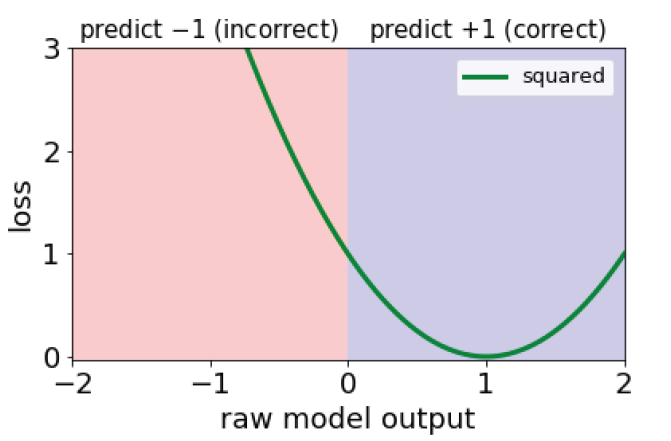


# ***Logitsitc and SVM Loss Diagram***

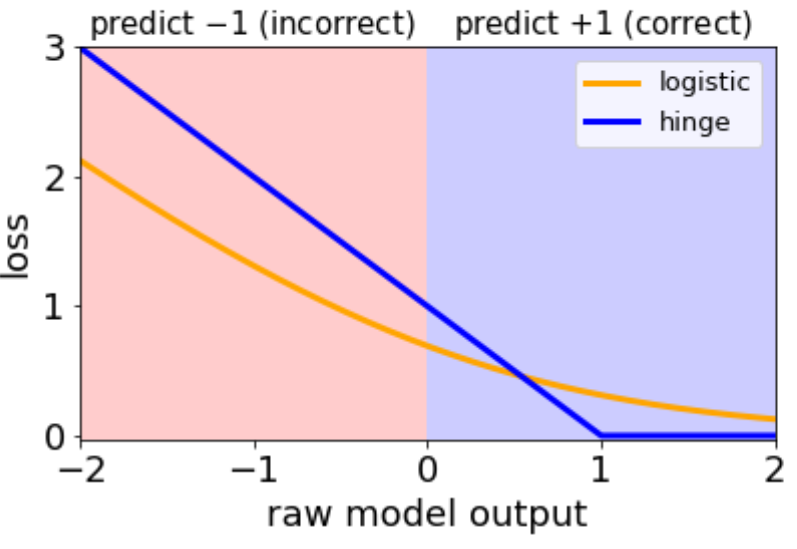

### ***Comparing the logistic and hinge losses***

Create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

* Evaluate the `log_loss()` and `hinge_loss()` functions **at the grid points** so that they are plotted.

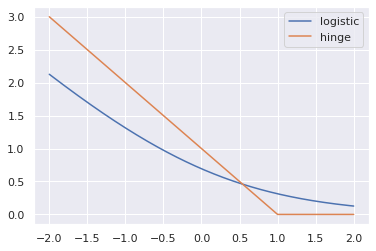

In [4]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

### ***Implementing logistic regression***

This is very similar to the earlier exercise where you implemented linear regression "from scratch" using **`scipy.optimize.minimize`**. However, this time we'll minimize the logistic loss and compare with scikit-learn's **`LogisticRegression`** (we've set **`C`** to a large value to disable regularization; more on this below).

The `log_loss()` function from the previous exercise is already defined in your environment, and the **`sklearn`** breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables `X` and `y`.


* Input the number of training examples into `range()`.
* Fill in the loss function for logistic regression.
* Compare the coefficients to sklearn's **`LogisticRegression`**.

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

breast = load_breast_cancer()
X, y = breast.data[:, 0:10], breast.target
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
scaler = StandardScaler()
X = scaler.fit_transform(X)

def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))

###########################################################################

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(y)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)
print("\n\n")
# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 1.03618525 -1.65378143  4.0830022  -9.40918664 -1.06786164  0.07894504
 -0.85109619 -2.4410334  -0.4528562   0.43352627]



[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]


As you can see, logistic regression is just minimizing the loss function we've been looking at. 

# ***Regularized Logistic Regression***

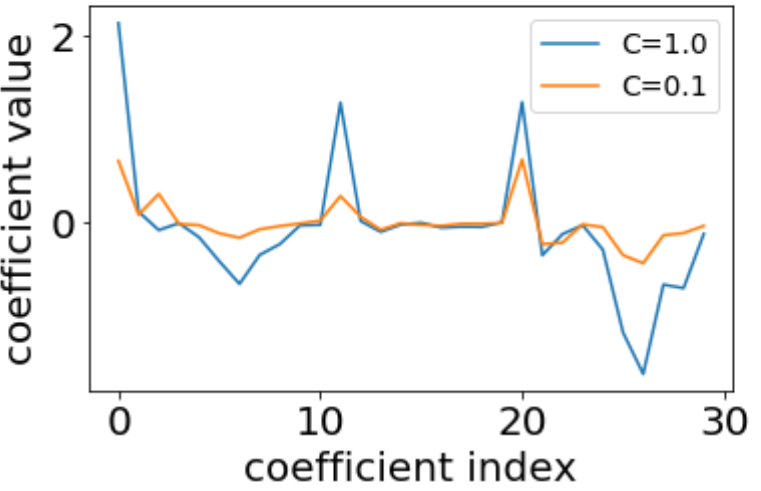

* ## Larger $C$ means less regularization
* ## Smaller $C$ means more regularization

### ***Regularized logistic regression***

In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables `X_train`, `y_train`, `X_valid`, and `y_valid`. The variables `train_errs` and `valid_errs` are already initialized as empty lists.

* Loop over the different values of `C_value`, creating and fitting a **`LogisticRegression`** model each time.

* Save the error on the training set and the validation set for each model.

* Create a plot of the training and testing error as a function of the regularization parameter, **`C`**.

* Looking at the plot, what's the best value of **`C`**?

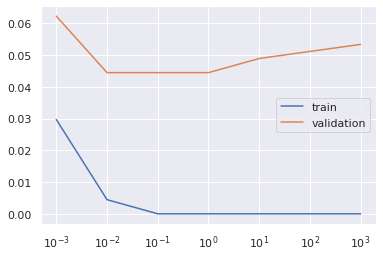

In [26]:
from sklearn import datasets

digits = datasets.load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=9999)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append(1.0 - lr.score(X_train, y_train) )
    valid_errs.append(1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

As you can see, too much regularization (small $C$) doesn't work well - due to underfitting - and too little regularization (large $C$) doesn't work well either - due to overfitting.

### ***Logistic regression and feature selection*** (ใช้ข้อมูล movie review ที่มันใหญ่ๆ)

In this exercise we'll perform feature selection on the movie review sentiment data set using `L1` regularization. The features and targets are already loaded for you in `X_train` and `y_train`.

We'll search for the best value of `C` using scikit-learn's **`GridSearchCV()`**.

* Instantiate a logistic regression object that uses `L1` regularization.

* Find the value of **`C`** that minimizes cross-validation error.

* Print out the number of selected features for this value of **`C`**.

In [ ]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))



```
    Best CV params {'C': 1}
    Total number of features: 2500
    Number of selected features: 1220
```
As you can see, a whole lot of features were discarded here.

### ***Identifying the most positive and negative words***

Interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable `lr`.

In addition, the words corresponding to the different features are loaded into the variable `vocab`. For example, since `vocab[100]` is `"think"`, that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

* Find the words corresponding to the `5` largest coefficients.
* Find the words corresponding to the `5` smallest coefficients.


In [ ]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")



```
Most positive words: favorite, superb, noir, knowing, loved, 
    
Most negative words: disappointing, waste, worst, boring, lame, 
```

### ***Regularization and probabilities***

Observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.

* Compute the maximum predicted probability.



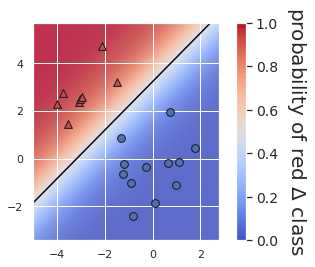

Maximum predicted probability 0.9973143426717812


In [30]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

X = np.array([[ 1.78862847,  0.43650985],       [ 0.09649747, -1.8634927 ],       [-0.2773882 , -0.35475898],       [-3.08274148,  2.37299932],       [-3.04381817,  2.52278197],       [-1.31386475,  0.88462238],       [-2.11868196,  4.70957306],       [-2.94996636,  2.59532259],       [-3.54535995,  1.45352268],       [ 0.98236743, -1.10106763],       [-1.18504653, -0.2056499 ],       [-1.51385164,  3.23671627],       [-4.02378514,  2.2870068 ],       [ 0.62524497, -0.16051336],       [-3.76883635,  2.76996928],       [ 0.74505627,  1.97611078],       [-1.24412333, -0.62641691],       [-0.80376609, -2.41908317],       [-0.92379202, -1.02387576],       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1])

# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

* ###  Create a model with `C=0.1` and examine how the plot and probabilities change.

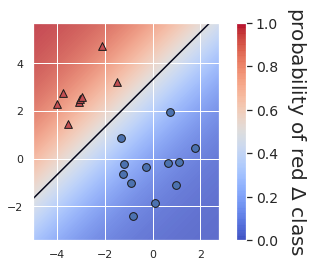

Maximum predicted probability 0.9352061679007128


In [31]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!

### ***Visualizing easy and difficult examples***

Visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables `X` and `y`. The `show_digit` function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

* Use the index of the digit that the model is most confident about.
* Use the index of the digit that the model is least confident about.
* Observe the images: do you agree that the first one is less ambiguous than the second?

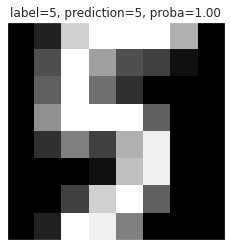

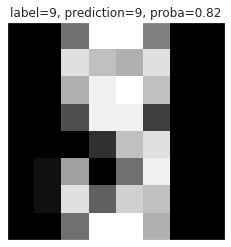

In [43]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

digits = datasets.load_digits()
X, y = digits.data, digits.target

lr = LogisticRegression(max_iter=9999)
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
# np.argsort เรียงจากน้อยไปมาก แต่ผลลัพธ์เป็น index ที่เรียง
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

The least confident example looks like a weird 9, and the most confident example looks like a very typical 5.

# ***Model coefficients for multi-class***

* ถ้ามี $n$ class ก็จะมี intercepts $n$ ตัว และก็มีสัมประสิทธิ์เท่ากับ จำนวน features $\times n$ 

### ***Fitting multi-class logistic regression***

Fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into `X_train`, `y_train`, `X_test`, and `y_test`.

* Fit a one-vs-rest logistic regression classifier and report the results.
* Fit a multinomial logistic regression classifier by setting the `multi_class` parameter, plus setting to be `solver="lbfgs"`, and report the results.

In [44]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(max_iter=9999)
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(max_iter=9999, solver='lbfgs', multi_class="multinomial")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 1.0
OVR test accuracy    : 0.9622222222222222
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9622222222222222


As you can see, the accuracies of the two methods are similar ???? on this data set.

### ***Visualizing multi-class logistic regression*** (ขี้เกียจเอาข้อมูลมาลง)

* The data set is loaded into `X_train` and `y_train`. The two logistic regression objects,`lr_mn` and `lr_ovr`, are already instantiated (with `C=100`), fit, and plotted.

Notice that `lr_ovr` never predicts the dark blue class… yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.

* Create a new logistic regression object (also with `C=100`) to be used for binary classification.

* Visualize this binary classifier with `plot_classifier`… does it look reasonable?

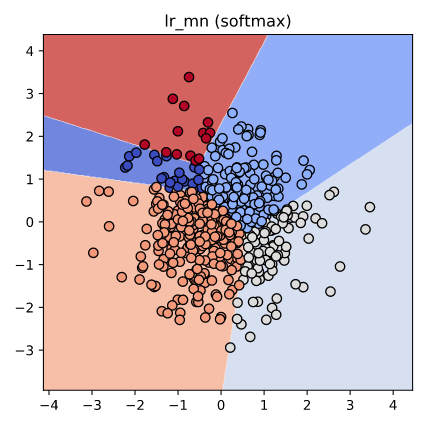

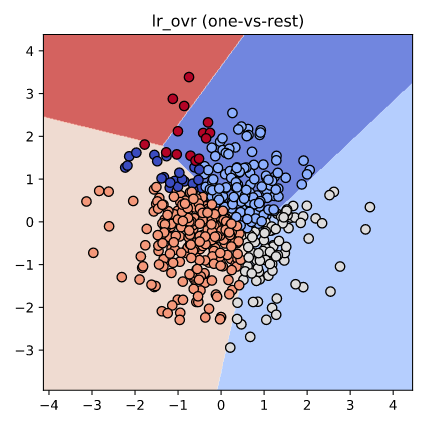

Softmax     training accuracy: 0.956
One-vs-rest training accuracy: 0.956


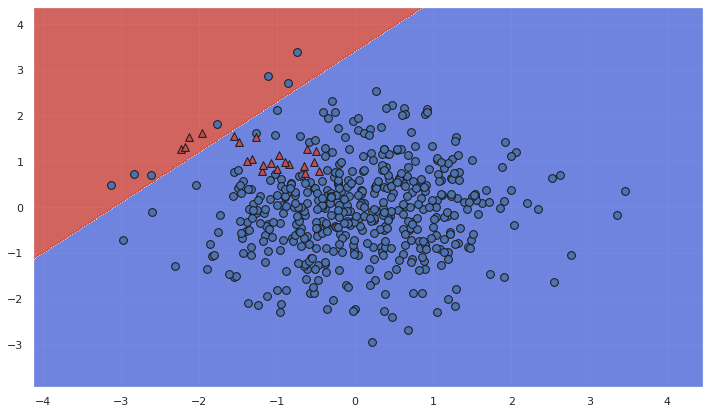

In [60]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100, max_iter=9999)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)
plt.show()


The binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.

### ***One-vs-rest SVM***



Instead of using LinearSVC, we'll now use scikit-learn's SVC object, which is a non-linear "kernel" SVM. Again, your task is to create a plot of the binary classifier for class 1 vs. rest.


* Fit an `SVC` called `svm_class_1` to predict class 1 vs. other classes.
* Plot this classifier.

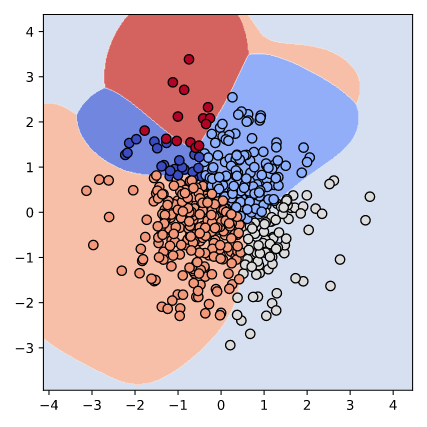

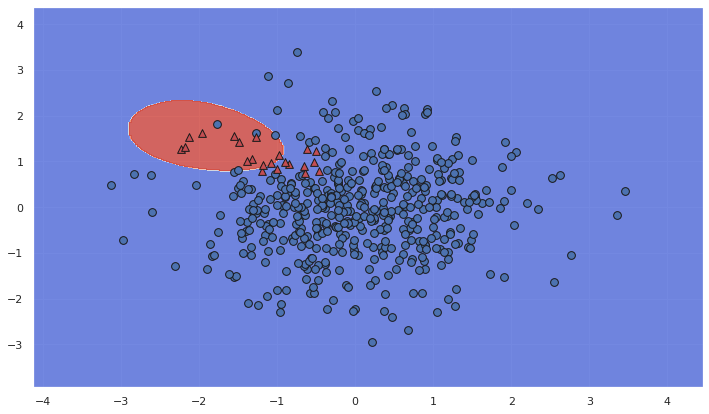

In [59]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)
plt.show()


The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.

## ***ด้านล่างเป็นข้อมูลของรูปในโจทย์สองข้อข้างบน***

In [48]:
X_train = np.array([[-2.83895657e-01, -9.51457706e-01],
       [ 5.33624372e-01,  1.23918071e+00],
       [-1.17337815e+00, -1.21258188e-01],
       [-1.19338379e+00,  7.97747166e-01],
       [-3.74902201e-01, -3.99647889e-01],
       [-1.11678880e+00, -3.63057976e-01],
       [ 3.92567929e-02, -1.03949311e+00],
       [-4.60496902e-01,  7.92206150e-01],
       [ 3.73372234e-01,  4.49455588e-01],
       [-5.68303256e-01, -1.12326024e+00],
       [-8.10825377e-01, -6.71197010e-01],
       [-2.23456895e-01,  5.01300063e-01],
       [ 3.31395128e-01, -8.81087488e-01],
       [ 1.23187925e+00,  6.36307263e-01],
       [-1.19438566e-01, -1.70031450e+00],
       [-3.56432381e-01,  8.17597947e-01],
       [ 3.68396844e-01, -4.89405078e-01],
       [-2.55373639e-01, -4.18075333e-01],
       [-1.32645347e+00,  1.04344987e+00],
       [-5.92850474e-01, -8.01421997e-01],
       [ 7.27961902e-01, -1.12489821e+00],
       [-2.13511481e+00,  1.53256634e+00],
       [ 2.30542073e-01, -8.68803803e-01],
       [ 1.09813977e+00,  5.83409537e-01],
       [ 8.38336530e-01,  6.17109567e-01],
       [ 4.86438237e-01,  3.06669383e-01],
       [ 7.86915440e-01,  4.44667097e-01],
       [-4.78932579e-01, -5.66539851e-01],
       [-2.03300554e-01,  9.36879327e-01],
       [ 3.39165831e-01,  8.12534012e-01],
       [-3.61733276e-01,  3.63540549e-01],
       [ 1.18603363e+00, -2.01359716e+00],
       [-4.87253757e-01, -6.37446081e-01],
       [-1.88698497e-01, -5.82874621e-01],
       [ 9.81411621e-01,  1.33941738e+00],
       [ 1.50189299e+00,  1.03081206e+00],
       [-6.44426536e-02, -3.81126339e-01],
       [ 1.28839740e+00,  1.54321683e+00],
       [-9.02379254e-01,  2.12912925e-01],
       [-2.75943790e-01,  6.62190410e-01],
       [ 1.85875489e-04, -2.22687852e+00],
       [-1.36218486e-01, -6.12143582e-01],
       [-8.01189309e-01, -7.31571602e-01],
       [-1.31114360e+00, -1.11160107e-01],
       [-1.82715882e-01,  3.45742341e-01],
       [ 1.62577984e+00,  9.82365559e-02],
       [ 1.18754221e+00, -9.88047256e-01],
       [ 3.30896348e-01,  1.74147081e+00],
       [ 1.06319463e+00,  7.25707477e-01],
       [-6.31172777e-02,  5.03138338e-01],
       [ 3.70221639e-01,  1.27315366e+00],
       [-3.14443989e-03, -2.64384583e-01],
       [ 3.57484301e-01, -2.27657772e-02],
       [-7.10889392e-01,  1.54688358e+00],
       [ 7.62329973e-01,  1.33254405e+00],
       [-1.55233553e+00, -1.52337441e+00],
       [-1.00339689e+00,  2.11862140e+00],
       [ 7.22823193e-01,  3.35405706e-01],
       [ 9.12755253e-02, -5.04468641e-01],
       [ 4.95114934e-02, -2.44690106e-01],
       [-1.40309968e+00, -5.12395416e-01],
       [-7.75501690e-01, -6.02394114e-01],
       [ 1.24435378e+00,  1.05314888e+00],
       [-2.23130848e-02,  1.87403279e+00],
       [-2.22779816e+00,  1.27046867e+00],
       [ 4.42928990e-02,  5.97549446e-01],
       [ 1.14098613e+00,  8.51490630e-01],
       [ 1.44165046e+00, -8.66600209e-01],
       [ 1.32295140e-01,  1.62653413e+00],
       [ 3.69308441e-02,  1.67786453e+00],
       [-6.12975983e-01, -1.35405850e+00],
       [ 8.22080441e-01, -7.45448227e-01],
       [-1.03015455e+00,  1.57828451e+00],
       [-1.27392825e+00, -1.19848757e-01],
       [-4.22882508e-01, -3.05961769e-01],
       [ 1.05127378e+00, -2.29052289e+00],
       [-7.89554501e-01,  8.57037168e-04],
       [ 3.73018740e-01, -4.98468373e-01],
       [-7.21550677e-01, -5.22821271e-01],
       [ 1.91021707e+00, -1.52700869e+00],
       [ 6.18671454e-01,  5.31270233e-01],
       [-1.12104559e+00,  2.87688027e+00],
       [ 1.21061741e+00, -5.48616370e-01],
       [-1.25680616e+00, -6.13281706e-02],
       [-1.50756706e+00,  4.18340765e-01],
       [ 7.11133123e-01, -7.15113895e-01],
       [-4.22620092e-01,  5.79287166e-01],
       [-9.34751978e-01,  3.60387487e-02],
       [ 1.21135650e+00, -5.78726752e-01],
       [-1.15320171e+00, -4.85969087e-02],
       [ 2.62171741e+00,  7.01010427e-01],
       [-1.48673284e-02, -9.33967286e-01],
       [-4.71193685e-01,  1.48297028e-01],
       [ 2.19748594e+00,  8.18579786e-02],
       [ 8.95326539e-01, -8.20358903e-01],
       [-6.17111080e-01,  1.27571264e+00],
       [ 1.09948335e+00, -1.26033634e+00],
       [-2.59602194e-01,  7.62758510e-01],
       [ 8.26861357e-01, -8.98524452e-01],
       [ 1.17328060e+00, -2.02972829e-01],
       [ 9.44652675e-02,  1.11263639e+00],
       [ 7.93685036e-02,  2.91707420e-01],
       [ 8.55134983e-01, -1.86820269e+00],
       [-3.33377592e-02, -8.21471683e-01],
       [ 1.08195801e+00, -9.12742251e-01],
       [-9.59114991e-01, -9.32883669e-01],
       [-1.09944058e-01,  4.29168341e-01],
       [ 8.47500557e-01,  2.00541178e-01],
       [ 8.97969301e-01, -1.34475096e+00],
       [-7.45549265e-01,  3.38558393e+00],
       [-2.35167941e-01,  1.16971717e-01],
       [ 3.82228847e-01, -1.89098191e+00],
       [ 4.46548315e-01, -1.90550205e-01],
       [ 1.03125402e+00, -6.10175894e-01],
       [ 8.98533636e-01, -8.27191628e-01],
       [-1.33555205e+00, -8.75184223e-01],
       [-3.82730422e-01,  1.30044462e+00],
       [ 7.03771022e-02,  3.63324429e-01],
       [-3.82547777e-01, -1.33433884e-02],
       [-9.28831114e-01, -1.24595217e-01],
       [-4.18020419e-01,  4.48693923e-02],
       [-1.14297594e+00, -4.20076628e-01],
       [-1.34085140e+00, -1.04693788e+00],
       [-5.75321695e-01, -1.87324354e+00],
       [ 1.05179314e+00,  1.50698744e-01],
       [-2.41168156e-01, -4.36437276e-01],
       [ 1.46929860e+00, -9.03666003e-01],
       [ 2.39422640e-01, -2.90113812e-01],
       [ 4.08505448e-01,  4.27716109e-01],
       [ 1.03080433e+00, -1.54913404e-03],
       [-1.02676711e+00,  7.21155407e-01],
       [ 1.24298760e+00,  6.05352492e-01],
       [ 9.98158704e-02,  7.85882456e-01],
       [-3.30989273e-01,  1.87923919e-01],
       [ 1.46427195e-01, -7.74987386e-01],
       [ 6.27556539e-01,  2.16992322e+00],
       [ 1.91133871e-01,  1.70918433e+00],
       [-3.87055670e-01, -1.23621603e+00],
       [ 1.30466697e+00,  1.89116566e-01],
       [-1.00664113e+00, -1.82069688e+00],
       [ 2.04048554e-01,  1.18707347e+00],
       [-1.30907152e+00,  5.66034777e-02],
       [ 3.40083444e-01, -9.90222332e-01],
       [ 2.13573178e-01, -2.94037076e+00],
       [-2.36084944e-02, -2.27832455e+00],
       [ 9.22675071e-01,  2.14198658e+00],
       [-8.85698364e-01, -1.82381255e+00],
       [-1.55801959e+00,  7.58114660e-01],
       [ 1.48191669e+00, -7.29229056e-01],
       [ 3.45873152e+00,  3.45013732e-01],
       [-3.87080518e-01,  1.11669888e+00],
       [ 4.38763001e-01,  6.12595812e-01],
       [ 6.72911640e-01,  1.14420429e+00],
       [ 8.93632281e-01,  3.54641572e-01],
       [-6.90807494e-01, -4.59634838e-01],
       [-4.15753108e-01,  2.07834911e+00],
       [ 4.17739748e-01,  1.15217233e+00],
       [-6.49536218e-01, -1.29778992e+00],
       [ 8.79936159e-01, -1.17037420e+00],
       [ 1.32963509e+00,  7.77819970e-01],
       [ 1.67576848e+00,  3.71978129e-01],
       [-1.00808260e+00,  2.57843572e-01],
       [ 1.53015384e+00,  2.27643840e-01],
       [-6.18754318e-01, -6.41954617e-01],
       [-8.71107452e-01,  3.11477892e-01],
       [ 6.37622987e-01,  2.03146691e+00],
       [-3.10980526e-01, -1.79036690e-01],
       [-6.45468284e-01, -1.25491015e+00],
       [ 4.71158947e-01, -2.39641054e+00],
       [-6.47038417e-01,  7.45740049e-01],
       [ 1.11893355e-01,  9.23820401e-02],
       [ 2.46226478e-01,  3.13062906e-01],
       [-1.01089039e-01,  3.62849379e-02],
       [ 1.71659568e-01, -1.35927630e+00],
       [ 3.40480960e-01,  1.16674832e+00],
       [-2.56618477e-01,  2.08152722e+00],
       [ 1.53315515e+00,  2.88728123e-01],
       [-5.31455590e-01,  4.13138729e-01],
       [ 1.39559634e+00,  1.21110653e-01],
       [-2.21472479e-01,  5.40642292e-01],
       [-4.96250861e-01, -3.33320300e-01],
       [ 6.16439064e-01, -1.03542338e+00],
       [-3.12897613e+00,  4.76362013e-01],
       [-6.99437789e-01, -1.75830724e-01],
       [ 1.71519587e+00,  1.01602638e-01],
       [ 5.19186062e-01, -1.35492173e+00],
       [ 6.82204596e-01,  8.73433968e-01],
       [-1.08581585e+00,  1.75168166e-01],
       [-4.22907282e-01, -5.65107061e-01],
       [-3.71555929e-01, -1.42305714e+00],
       [-8.21577003e-01,  5.28010495e-01],
       [ 7.86870071e-02,  9.24843550e-02],
       [-2.16193119e-01,  5.86193381e-01],
       [-1.22548359e+00,  2.48846802e-01],
       [-1.55000064e+00,  1.56518980e+00],
       [-9.60286755e-01, -3.40835920e-01],
       [-1.21420118e+00, -3.54183421e-01],
       [-6.17941477e-01,  8.49677284e-02],
       [-1.26821697e+00,  1.53634503e+00],
       [-1.04121511e-01, -3.09345590e-01],
       [-3.24089313e-01,  9.14684501e-02],
       [-3.46051731e-01,  2.71948412e-01],
       [ 5.49168052e-01, -7.03300534e-02],
       [-6.29554699e-02, -8.28104012e-02],
       [-1.66552903e-01, -6.81026187e-01],
       [-1.86519153e+00, -8.10162292e-01],
       [ 5.66593537e-02, -4.18745854e-01],
       [ 2.34711021e+00, -3.27882927e-02],
       [ 6.42344993e-01,  4.65635453e-01],
       [ 8.19580983e-01, -1.38034832e+00],
       [-1.27525615e+00,  1.62592404e+00],
       [ 4.18990622e-01, -2.34217819e-01],
       [-6.45499218e-01, -1.68068271e-01],
       [ 5.87115685e-01,  1.26968048e+00],
       [-1.38994421e+00, -3.17576787e-01],
       [ 1.33279793e+00,  5.91125442e-01],
       [-1.14989342e+00, -6.18127175e-01],
       [-4.78690715e-01, -1.60450115e+00],
       [ 1.54541507e+00,  1.55276018e-01],
       [ 7.28423987e-01, -3.30380155e-01],
       [-1.07899557e+00,  9.56753137e-01],
       [ 1.73158536e+00, -1.45930768e+00],
       [-8.50859191e-01,  9.46701140e-01],
       [ 6.85189932e-01, -5.03068765e-01],
       [ 6.67027648e-01,  6.86137104e-01],
       [ 2.52037478e+00,  6.25413897e-01],
       [ 1.23372005e+00,  2.51603284e-01],
       [ 5.81184053e-02,  4.51137245e-02],
       [-2.01775288e-01, -8.08414669e-01],
       [-2.83241465e+00,  7.23569524e-01],
       [ 1.11794340e+00,  2.66169426e-01],
       [-1.48414526e+00,  1.41802404e+00],
       [-2.17997557e-01, -4.27031273e-01],
       [ 1.05131170e+00,  1.03823987e+00],
       [ 4.73478589e-01,  2.22850843e+00],
       [ 3.79073150e-01, -4.04320588e-01],
       [-4.85248870e-01, -4.63422678e-01],
       [-6.52513292e-01, -8.00667406e-02],
       [-1.10638994e-01, -9.52893744e-02],
       [ 9.72278149e-01, -6.81695817e-01],
       [-5.74704425e-01,  5.46743761e-01],
       [ 2.61211937e-01, -9.00517980e-02],
       [-3.13766608e-01,  2.99858742e-01],
       [-7.53824274e-01, -3.62056163e-01],
       [-8.57537689e-01,  2.70991980e+00],
       [ 1.17612860e-01,  8.06824976e-01],
       [ 5.63697109e-01,  6.45696112e-01],
       [-1.43600626e+00,  5.59475465e-01],
       [-6.51804104e-01, -6.72113868e-01],
       [ 7.44253455e-01,  5.70717760e-01],
       [-5.96343760e-01, -1.18964250e+00],
       [ 5.96500258e-01,  2.00513480e+00],
       [ 9.46339546e-01,  8.25057696e-01],
       [-9.49552255e-01, -2.12707718e+00],
       [ 7.77784328e-01,  4.12740359e-01],
       [-2.14872339e-02, -3.21881539e-01],
       [ 4.64142337e-01,  4.71265171e-01],
       [-1.00162254e+00,  5.59504404e-02],
       [ 4.22650852e-01,  7.07834832e-01],
       [-4.19091926e-01,  4.21446505e-04],
       [ 3.80532136e-01, -8.62496826e-01],
       [-6.88095193e-01,  3.83724014e-03],
       [-1.38296737e+00,  1.01773102e+00],
       [-1.56727614e-01, -1.00625917e-01],
       [-7.02790559e-01, -5.34264482e-01],
       [ 4.53674228e-01,  2.26399723e-01],
       [-3.70977024e-01, -9.02532647e-01],
       [ 9.95739869e-01, -4.29823772e-01],
       [ 3.21633047e-01, -4.81996737e-01],
       [-3.59761073e-01, -5.19486660e-01],
       [ 2.63949169e-01,  2.54547095e+00],
       [ 4.00202410e-01,  2.16159036e+00],
       [ 8.54602127e-01, -1.08544729e+00],
       [ 1.17409647e-01,  6.72164886e-03],
       [-2.96916269e+00, -7.24299000e-01],
       [ 8.98734164e-01,  2.03360105e+00],
       [ 9.14885199e-01,  2.08795727e+00],
       [ 3.52225950e-01,  1.11807396e-01],
       [-5.02642449e-01, -8.94881511e-01],
       [-2.07926031e-01, -2.26007844e-01],
       [-2.98067495e-01,  1.21007972e+00],
       [ 5.59552710e-01,  6.16856924e-01],
       [-2.13331328e-01, -1.37176907e+00],
       [-7.71592298e-01,  2.56522853e-01],
       [-8.91009324e-02,  5.85928029e-01],
       [-6.59158060e-01,  8.93140184e-01],
       [-1.66256529e-01, -9.80095936e-01],
       [-1.45293634e+00, -6.79306038e-01],
       [ 2.58459533e-01, -1.59507701e+00],
       [-6.16562642e-01,  3.37553869e-01],
       [ 1.99332380e+00,  3.76100676e-01],
       [ 1.31749904e+00,  1.14525370e+00],
       [ 6.77627652e-01, -2.69028412e+00],
       [-7.24054641e-01, -3.00028828e-01],
       [-2.15908250e-01,  1.73361026e+00],
       [-4.26627903e-01,  3.95005345e-02],
       [ 1.13473732e+00, -2.06468477e-01],
       [ 1.56815803e+00, -1.47455508e-01],
       [ 7.86715120e-01, -2.32062876e-01],
       [ 9.87933166e-01,  1.60843618e-01],
       [ 1.90729163e+00,  1.27409312e-01],
       [ 3.59355853e-01, -1.04640821e+00],
       [-9.46647182e-01,  6.22098825e-01],
       [-2.46689280e-01,  2.57307271e-01],
       [ 2.67800451e-01,  4.40998924e-01],
       [-1.83371684e+00, -1.07635433e+00],
       [-7.32318763e-02,  1.25985823e+00],
       [ 6.97274340e-01, -4.56201361e-01],
       [ 9.15469974e-02,  3.47279873e-01],
       [-1.34215495e-01,  1.53634006e+00],
       [-2.01959589e-01,  7.40056156e-01],
       [ 1.29536211e+00, -1.79185232e+00],
       [ 6.35987451e-01,  1.34724258e-02],
       [-7.52186057e-02,  2.37048909e-01],
       [-7.38858807e-01,  4.31069515e-03],
       [ 2.76485783e+00, -1.04532813e+00],
       [-8.28286409e-01,  4.96139031e-01],
       [ 6.72941893e-01, -3.08256204e-01],
       [ 3.56320956e-01, -1.71854210e-01],
       [-1.83052452e-01,  9.93778673e-01],
       [ 6.07162324e-01, -4.87940009e-01],
       [-1.45724708e+00, -5.57288015e-01],
       [-1.95713287e-02, -7.27061061e-01],
       [-3.03595807e-01,  2.45310326e-01],
       [ 4.25748084e-01, -2.73044964e-01],
       [ 1.28042925e+00, -2.17265698e+00],
       [ 1.13616284e+00, -7.01750647e-01],
       [-5.15620443e-01,  4.27429863e-01],
       [ 1.17568017e+00, -1.09936359e-01],
       [-1.36411847e+00, -3.62075361e-02],
       [-3.03338789e-01,  2.32516450e+00],
       [ 4.21265199e-01, -1.48184608e+00],
       [-1.56356664e+00,  2.43979829e-01],
       [-1.89370094e+00, -1.34857851e+00],
       [-1.81369673e+00, -1.04035943e+00],
       [-1.30487016e+00, -6.09707799e-02],
       [-3.87350229e-01, -1.20156767e+00],
       [ 1.85116618e+00, -2.47765287e-02],
       [ 2.55609131e-01,  4.43817616e-01],
       [-7.23423000e-01,  6.87936650e-01],
       [ 7.19675853e-01,  1.63807539e+00],
       [ 4.07528586e-01, -4.57875958e-01],
       [ 1.27239160e+00,  7.54197611e-01],
       [-7.33084811e-01, -1.22625870e+00],
       [-1.00146686e+00,  8.22587011e-01],
       [ 8.74280306e-01, -4.28087542e-02],
       [-2.60254075e+00, -1.04374295e-01],
       [ 2.47129653e-01, -2.39347095e-01],
       [-1.32192531e+00, -2.47002839e-01],
       [-1.50342772e+00,  8.14205321e-01],
       [ 1.31894693e+00, -7.79305377e-01],
       [ 1.07114856e+00,  5.61995551e-01],
       [-9.48056016e-01,  4.62884142e-01],
       [-1.47049629e+00, -3.10810395e-01],
       [-1.52246111e+00, -1.50083105e+00],
       [ 6.62394356e-01,  2.32762068e-01],
       [-1.77646954e+00,  1.80796912e+00],
       [-1.33919576e+00,  4.00842900e-01],
       [ 4.55071208e-01, -8.87571298e-01],
       [-9.27020245e-03, -1.02678468e+00],
       [ 7.87715149e-01, -4.74965423e-01],
       [-6.80287514e-01,  7.01827786e-01],
       [ 2.34664160e-01,  1.02683424e+00],
       [ 8.36586885e-03, -2.05581122e-01],
       [ 1.87547736e+00,  8.75869903e-01],
       [-3.47955037e-01,  1.95290688e+00],
       [-7.67038989e-01,  9.10960121e-02],
       [ 2.63033753e-01,  4.72970318e-01],
       [ 3.09943712e-02,  1.95394133e+00],
       [-1.13433110e+00, -1.95408174e+00],
       [-9.01631724e-02, -3.38637356e-01],
       [ 1.10103317e-01,  1.61216978e+00],
       [ 1.49961133e+00,  2.21729968e-01],
       [-1.18243595e+00,  9.17843166e-01],
       [-1.15438675e+00, -1.19451959e+00],
       [-1.96908372e+00,  1.61768855e+00],
       [ 1.04567355e+00,  1.07875346e+00],
       [ 7.72705301e-01,  9.98823749e-01],
       [-1.35997652e+00, -4.98768895e-01],
       [-9.04834584e-01,  2.33921986e-01],
       [-4.95178016e-01, -4.39195245e-02],
       [-5.93938849e-01,  1.42820254e+00],
       [ 5.59304094e-01, -1.15873862e+00],
       [ 2.16040528e-01, -8.17380088e-02],
       [ 1.91528001e-01, -1.69325925e+00],
       [ 1.10434170e+00,  2.84340339e-01],
       [-1.09580513e+00,  5.86898099e-01],
       [ 6.32328497e-01, -5.91375311e-01],
       [ 2.03614132e+00, -3.90471672e-01],
       [ 5.38816211e-01,  1.25914174e+00],
       [ 1.03704347e+00, -2.23606708e-01],
       [ 1.19372766e+00, -1.14210183e+00],
       [ 1.51355134e+00, -5.83971183e-01],
       [-1.07182512e+00, -6.52605083e-01],
       [-4.77214399e-02,  5.16168230e-01],
       [-7.41155815e-01, -2.03127300e-01],
       [-5.26219209e-01,  9.80301155e-01],
       [-1.72741909e+00, -1.65621733e-01],
       [ 6.08561524e-01, -1.45370511e-01],
       [ 2.68417609e-01,  4.10423630e-01],
       [ 3.35639118e+00, -1.76397176e-01],
       [ 7.24257981e-01, -3.60339382e-01],
       [ 1.06875286e-01, -1.85461448e-01],
       [-2.17547662e+00,  1.31572316e+00],
       [ 7.05906132e-01, -2.16529995e-03],
       [-1.37692376e+00, -2.09079539e+00],
       [ 2.46229942e-01, -1.12744334e+00],
       [ 8.02523744e-01,  7.75491394e-02],
       [ 1.91706758e+00,  1.43183414e+00],
       [ 3.73242087e-01, -2.27227927e+00],
       [-1.44161294e+00, -9.97108872e-01],
       [-5.28857450e-01, -1.87424747e+00],
       [ 1.43258736e+00, -3.37113081e-02],
       [ 2.07234655e-01, -3.09076870e-01],
       [ 3.90215099e-01,  8.72054171e-01],
       [ 7.45161918e-01, -1.87417848e+00],
       [-8.99287804e-01,  4.02730489e-01],
       [-4.91389477e-01,  3.07685767e-01],
       [-5.11938656e-01,  1.47585371e+00],
       [ 1.52300602e+00,  2.58514757e-01],
       [ 4.24973478e-02,  2.57461361e-01],
       [-9.04075115e-01,  9.96421859e-01],
       [-2.10108887e-01,  4.44708778e-02],
       [ 1.03676621e+00, -8.92949123e-01],
       [ 4.53475954e-01, -8.41371282e-02],
       [ 1.27061789e+00, -1.67840458e-01],
       [-2.80065465e-01, -2.03211468e+00],
       [-2.30813912e+00, -1.29304958e+00],
       [-7.74356188e-01,  3.19574013e-01],
       [ 1.87887312e-01, -2.45362957e-01],
       [-4.72937053e-01, -1.27600645e+00],
       [ 1.22272244e+00,  2.87961812e-01],
       [-1.47938168e+00,  4.78233386e-01],
       [ 3.44089778e-01,  9.24369569e-01],
       [-1.47820336e-01,  1.78836253e-01],
       [-2.61313086e+00,  7.06282124e-01],
       [ 2.06035418e+00,  1.21243436e+00],
       [-9.60549064e-01, -2.29243260e+00],
       [ 4.33027171e-01,  1.16868694e+00],
       [ 9.03617320e-01, -9.07428912e-01],
       [-4.29349702e-01,  2.08682098e-01],
       [ 1.18723781e+00,  9.60222494e-01],
       [ 8.70232033e-01, -7.31800954e-01],
       [-8.39153310e-01,  4.25780276e-01],
       [ 9.10585432e-01,  4.83166022e-01],
       [-1.42955178e-01, -3.48926918e-01],
       [-1.76109418e+00, -5.47684733e-01],
       [ 7.12915565e-01, -1.20512064e+00],
       [ 1.99865471e+00,  1.11107025e+00],
       [ 6.08398173e-01,  6.44423717e-02],
       [-3.15608408e-01,  2.14631103e-01],
       [-1.05242232e+00, -3.29021132e-01],
       [ 1.71535143e-01,  1.58322635e+00],
       [-6.35773050e-01, -1.56803626e+00],
       [-8.89829669e-01, -1.39746713e+00],
       [-5.07586883e-01,  1.22201642e+00],
       [-1.61711936e+00, -1.47048434e+00],
       [-9.29768710e-02, -1.75262884e+00],
       [ 3.69138690e-01,  8.05857912e-01],
       [ 2.94671774e-01,  5.80944613e-01],
       [ 3.70936983e-01, -9.85710205e-02],
       [-9.25708081e-01, -7.22894280e-01],
       [-1.11548831e+00, -9.57694317e-01],
       [-1.18669763e+00, -7.42497045e-01],
       [-2.24840754e-01, -5.93059064e-02],
       [-6.41667586e-01,  5.37284099e-01],
       [ 2.37396532e-01, -5.76700064e-01],
       [ 2.54272550e+00, -1.63058088e+00],
       [-8.87373181e-01,  1.95202568e-02],
       [ 3.84847607e-01, -7.51008417e-01],
       [-1.46282978e+00,  3.08199826e-01],
       [-3.66702316e-01, -2.23582305e+00],
       [ 6.43664449e-01, -8.32684408e-01],
       [-2.04183218e+00,  4.87795183e-01],
       [ 1.13515625e+00, -9.85409189e-01],
       [ 1.28410505e+00,  1.43881405e+00],
       [ 5.85979267e-01,  7.46602215e-01],
       [-6.93376209e-01, -8.44376740e-01],
       [ 1.45451916e+00,  1.05476312e-01],
       [ 2.38609334e-01, -4.31543600e-02],
       [-5.12863852e-01, -1.35550194e+00],
       [-1.24472169e+00,  1.62495117e-01],
       [-2.12720688e-01,  4.06861023e-01],
       [ 3.63530110e-01,  1.25938338e+00],
       [ 1.10058109e+00,  9.84706123e-01],
       [-5.35740682e-01, -1.74105144e+00],
       [ 5.35714841e-01,  5.41693020e-01],
       [-9.70468122e-01,  1.14890818e+00],
       [-1.09988936e+00, -4.78052396e-01],
       [ 1.27920406e+00, -8.08848981e-01],
       [-1.36798424e+00,  3.99855057e-01],
       [ 1.01065618e+00, -2.62314558e-01],
       [ 1.34576187e+00, -4.47251284e-01],
       [-3.68049070e-01, -3.43437389e-01],
       [-4.96020550e-01, -4.62734100e-01],
       [-1.24062149e+00, -2.13638805e+00],
       [-5.52547887e-01, -1.10351078e+00],
       [ 8.85081661e-01,  4.38362730e-01],
       [ 9.43883760e-01,  1.26227065e-02],
       [-4.29917047e-02,  7.78520148e-01]])

X_test = np.array([[-1.34465101, -2.26614044],
       [-0.32865543,  1.7199352 ],
       [-0.38556198, -1.10293497],
       [-0.59409192,  0.50909783],
       [-0.45020184, -0.32346529],
       [ 1.96242331, -0.26428947],
       [ 0.27631065,  1.32528925],
       [-0.40455156,  0.14751013],
       [ 2.15096494, -0.14275803],
       [ 0.32936575, -2.31948625],
       [ 2.24051695, -0.2786841 ],
       [ 1.34997939, -1.30411437],
       [-2.33072328, -0.34399448],
       [-1.63884804, -1.06558444],
       [-1.73164469,  0.37087798],
       [-0.93909125, -0.25699494],
       [ 0.28363915, -1.34156921],
       [ 0.38675712, -0.45635246],
       [ 1.22399964,  0.3267895 ],
       [-0.62322555, -0.31320069],
       [ 1.16981311, -0.98630593],
       [ 0.26263222,  0.53160959],
       [ 0.00845572,  0.39308722],
       [ 0.35742073, -0.79709013],
       [ 1.22594718, -0.17651664],
       [-0.2291465 , -0.5225278 ],
       [-0.71702387, -0.95066689],
       [-0.27868802, -0.85262172],
       [ 1.56791918, -2.05244694],
       [ 0.83079924,  0.38397881],
       [-0.985856  ,  2.89009141],
       [ 0.51794674,  0.3102239 ],
       [-0.83509458,  0.71589072],
       [ 1.67547357,  1.46080482],
       [-1.92457612, -1.19174314],
       [-1.53911268, -0.62193116],
       [ 0.93878497, -1.99357108],
       [-0.43974924,  0.75725902],
       [ 0.50716337, -0.61561751],
       [-0.44155973, -0.0634485 ],
       [ 0.26174037, -2.20675797],
       [-2.01406294,  1.45598348],
       [-0.66627166,  0.78292363],
       [ 0.17773125, -0.49998699],
       [-1.39541252,  2.89433818],
       [-0.11632517, -1.39214313],
       [-0.1832056 , -1.33504731],
       [-0.53503676,  0.76006459],
       [ 0.15103826,  0.89661204],
       [ 0.10740531, -0.56505626],
       [-0.71691362, -0.34056518],
       [ 0.05222327, -0.45575456],
       [ 1.15138653, -0.59483815],
       [ 1.03315199, -0.36327258],
       [-1.1054148 , -0.2347066 ],
       [ 1.50688815,  0.70080228],
       [ 0.64493573,  0.95217211],
       [ 1.86341957,  0.23760834],
       [-0.16737836,  0.0939934 ],
       [ 0.67115251, -0.7118477 ],
       [ 2.35294461, -1.43283029],
       [-0.11470158, -0.18968908],
       [ 0.46128022, -0.93567616],
       [ 1.80306563, -1.45073926],
       [ 0.94136203,  1.292803  ],
       [ 0.28620168,  0.41111709],
       [ 2.17419308,  1.85584184],
       [ 0.86393111,  1.19127031],
       [-2.06954883, -0.77461538],
       [-0.05985031, -1.37013412],
       [-0.66296296, -1.16878314],
       [-0.95841834, -0.77454004],
       [-0.57529178, -1.59481683],
       [-0.29043126,  0.05329898],
       [ 1.35243687, -1.12998014],
       [-1.46017337, -1.39209563],
       [-0.84215913,  0.30534851],
       [-2.15004986,  0.42624385],
       [ 1.70073763,  0.13882362],
       [-1.60362318,  0.98361558],
       [-0.70983126,  0.35478203],
       [ 1.97477604,  0.18397712],
       [ 0.31468954, -1.17838197],
       [ 1.87467687, -1.29037662],
       [ 0.09091981, -0.44979106],
       [-0.23061753,  0.5641193 ],
       [-0.40570928,  0.12263708],
       [-1.69868505,  0.43491546],
       [ 0.00888999, -0.01895348],
       [ 1.72935555,  1.19246428],
       [ 1.09576759, -1.42922671],
       [ 0.82835623,  3.07663722],
       [-1.33006473,  0.08309368],
       [ 1.36919674, -0.9184282 ],
       [ 1.46110438, -0.54795873],
       [ 1.33458119, -3.00612755],
       [-0.85871968,  0.90913099],
       [ 0.99965306,  0.45476029],
       [ 1.98239695,  0.32743096],
       [ 1.96181619,  1.88103844],
       [ 0.40399581,  0.77147847],
       [-0.13524821,  1.94587051],
       [-1.17576939,  0.51456585],
       [ 0.22768812,  0.97303776],
       [-0.04154908,  1.44062852],
       [ 0.589061  ,  0.94927972],
       [-0.26217031, -0.29896892],
       [ 0.26120675,  0.14582473],
       [ 1.0298834 , -0.62924135],
       [ 0.88547767, -0.74549024],
       [ 1.86160184, -1.29369606],
       [ 0.99704618, -0.31247036],
       [ 0.83329917,  0.1089282 ],
       [ 0.19387131, -1.68326152],
       [-0.65100268,  0.16241344],
       [ 0.35073479,  0.162285  ],
       [-1.72887707,  0.1655581 ],
       [-0.69928472,  0.54749564],
       [ 1.07478693, -1.53941586],
       [-0.51360716, -1.53535041],
       [ 1.01150011,  0.58736823],
       [ 0.85102169, -1.59439833],
       [ 0.51154086, -0.06340594],
       [-0.2195247 ,  0.32707891],
       [ 0.84419285, -0.61369894],
       [ 0.24925361, -0.56812028],
       [-0.13548062,  1.63567906],
       [ 1.36729012, -1.21786399],
       [ 1.44291349,  1.10823448],
       [ 2.8080249 ,  1.04873374],
       [ 1.15697326, -1.21452873],
       [ 0.37106995, -1.3951414 ],
       [-2.47179652,  0.61803615],
       [-1.05125017, -0.95901335],
       [-0.82679708,  0.4086774 ],
       [-0.63524218, -0.19752938],
       [ 0.87928936,  1.1472498 ],
       [ 0.42378698,  1.0907401 ],
       [ 0.58497441,  0.11420683],
       [ 0.24243168,  1.28833013],
       [-0.02990594, -0.63844858],
       [ 0.52000687,  1.01456737],
       [-0.17251864, -1.7901574 ],
       [-1.95491702,  0.3596653 ],
       [-0.87695352, -0.18366918],
       [ 1.39368203,  0.43583234],
       [-1.59344711,  0.19137056],
       [ 1.77137868, -0.31237139],
       [-0.23158234, -1.32726647],
       [-0.54855599, -0.60926482],
       [ 0.33503583, -0.67904986],
       [-0.27939938, -0.62690169],
       [ 1.31601056, -0.22469021],
       [-1.09499397, -0.24736406],
       [-2.02244733, -0.69577374],
       [ 0.86737676,  1.38087744],
       [-0.90380528, -0.59445765],
       [ 1.55665174, -1.39143981],
       [ 0.48540433, -0.2064929 ],
       [-0.18422962,  1.88008786],
       [ 0.59195238, -2.01458558],
       [ 0.15670956, -0.78966394],
       [ 0.52405128, -0.79428385],
       [ 0.46697843, -2.00008466],
       [ 0.36681713, -0.5945539 ],
       [-0.97665886,  0.32486847],
       [ 0.63651706,  1.62899934],
       [-0.11560054, -0.37221586],
       [-0.96931518, -0.20763414],
       [ 1.28619793,  1.05577697],
       [ 2.12465122,  0.16835   ],
       [ 1.43513092,  0.30735085],
       [ 0.58398315, -0.39783983],
       [-0.21626626,  2.05229324],
       [ 0.3527066 ,  1.79906105],
       [ 0.18040376, -1.206196  ],
       [ 0.54736708, -0.23614603],
       [-0.15674806, -0.26972697],
       [-0.85837837,  0.9676381 ],
       [ 0.3811086 , -0.54360528],
       [-0.76122789,  0.66437018],
       [-0.3731813 , -1.32972325],
       [ 1.18200233,  0.06458171],
       [-0.44884803,  0.40044713],
       [ 0.4153961 , -1.31408929],
       [-0.13413013, -0.46966409],
       [-0.58991973,  0.95239839],
       [ 0.11731011,  2.13183997],
       [-0.04544122,  0.426224  ],
       [-0.61530528,  0.18541742],
       [-0.50369289,  1.41354132],
       [ 1.55236298,  0.33565951],
       [ 0.79420127, -0.85561755],
       [ 0.77662425, -0.16228843],
       [-0.28395301, -1.13868265],
       [-0.1583218 ,  0.44731141],
       [-1.56786954,  0.59320832],
       [ 0.56044012, -0.62821279],
       [-1.01660445, -0.76803942],
       [ 1.24224888,  1.09118403],
       [ 0.28212575, -2.22530176],
       [-0.08901837,  0.89214085],
       [ 0.08810794, -0.73853008],
       [ 0.37283919,  1.79993801],
       [-0.72489869,  0.64074588],
       [-0.35913004, -1.04100342],
       [ 1.08115706, -0.93505527],
       [-2.11388539,  0.82257263],
       [ 0.9778787 , -1.32804876],
       [ 1.17807745,  0.29356809],
       [ 0.56777838,  0.01033078],
       [ 0.85893879, -1.25805944],
       [ 0.56365965,  0.6646633 ],
       [ 1.12855994, -0.21520059],
       [ 0.08045979, -0.03739406],
       [-0.95954835, -0.05709407],
       [-0.2306438 ,  0.74677976],
       [ 1.21087334, -0.228034  ],
       [ 0.65171202,  0.91831128],
       [-0.49513056, -1.21858777],
       [ 1.50722175, -0.01154299],
       [ 0.22667987, -1.10280131],
       [-1.41409051, -1.45647225],
       [ 0.54703749,  0.65444379],
       [ 1.31208184,  1.96854891],
       [ 1.6640423 ,  0.36169939],
       [-0.00917131, -0.514214  ],
       [-0.69958362,  0.19570313],
       [-1.28741611, -0.1263363 ],
       [ 0.40587379,  1.29982616],
       [ 0.68584148,  0.53626244],
       [ 0.89930066,  0.17610995],
       [-0.28895802,  1.12721179],
       [-0.23579128,  1.7006597 ],
       [-0.45185601,  0.30020568],
       [ 0.25005512, -0.67208365],
       [-0.35916392,  1.48641299],
       [ 0.78739606,  0.17008335],
       [-0.00474962,  0.70826809],
       [-0.63598532,  1.02726841],
       [ 0.36712998, -0.52214504],
       [ 0.80186681, -1.34034563],
       [ 0.83947341, -0.27139738],
       [ 1.64626298,  1.62630608],
       [ 1.11060859, -0.32548613],
       [-0.17491694, -0.19078171],
       [ 0.37943248, -0.92124305],
       [ 0.69146856,  0.94563765],
       [-1.10428539, -0.19254266],
       [ 1.11311917, -0.98389646],
       [-0.52854454, -0.10040703],
       [ 1.72316104, -1.90902235],
       [ 1.79998467, -0.51170931],
       [-0.26234591,  0.07022115],
       [-1.14910729, -0.05398757],
       [-0.51346459,  0.9682808 ],
       [-0.28672484, -1.27311119],
       [ 0.78711322,  0.02411787],
       [ 0.3552477 ,  0.52549037],
       [ 0.71423712,  0.34248554],
       [ 1.65915965,  0.45028551],
       [ 0.04479423,  0.30899375],
       [ 0.00634313,  0.15027701],
       [-0.40812875, -1.43248478],
       [-0.51851114, -0.1611155 ],
       [ 0.50410881, -0.01895475],
       [ 0.74448292,  1.00323372],
       [-0.266259  ,  0.04147344],
       [-0.03834983, -0.63603526],
       [-0.23108258, -0.076741  ],
       [ 0.10591246, -0.74024262],
       [-0.57683057,  0.17407638],
       [-0.18091513, -0.37261146],
       [ 1.20800099,  0.0746839 ],
       [-2.67302469,  0.59351587],
       [-0.31407839, -1.38603696],
       [-1.45843012, -0.24958656],
       [ 0.64578225, -0.97748368],
       [ 1.18900756,  0.07545013],
       [ 1.31373825,  0.20667937],
       [ 0.4808747 , -0.32026384],
       [ 1.00744423,  1.44978999],
       [ 0.24447313,  0.76894236],
       [ 1.41025949,  1.28564604],
       [-2.49678591,  0.98198976],
       [-1.73295353,  1.86129229],
       [-0.48695319,  0.55318217],
       [ 0.57604682,  0.62149135],
       [ 1.15978137, -0.37641116],
       [ 1.49063555, -1.41047803],
       [-1.76167607, -0.56297318],
       [ 1.37018927,  0.38371323],
       [ 1.99295014,  0.85804536],
       [ 0.1497498 , -0.79350156],
       [-1.29860651, -2.02409988],
       [ 3.18272304,  0.48817131],
       [-0.761938  ,  0.83609537],
       [ 0.6788163 , -0.57247302],
       [-0.25873566,  0.87147852],
       [ 0.24073414, -0.2461742 ],
       [ 2.00393555,  0.47708233],
       [-0.63041296,  0.22263431],
       [ 1.22329101, -0.51106236],
       [ 1.81825845, -0.94738334],
       [ 0.88163719, -0.68660006],
       [ 0.83244757,  1.49192276],
       [ 1.3708283 , -1.32402956],
       [-0.27029846,  0.56773195],
       [-0.12984589, -0.35286186],
       [-0.40782069,  0.05743697],
       [ 1.1735168 , -0.7118709 ],
       [ 0.97964183,  0.93263637],
       [ 0.99244415, -0.3085323 ],
       [-1.45256647, -0.50006282],
       [-0.54944014, -0.7961944 ],
       [-0.676308  , -0.09157667],
       [-1.51441388,  0.51007701],
       [-0.14991133, -0.04936842],
       [-0.17990269,  1.61722425],
       [ 0.85302082, -0.04660975],
       [ 1.05986637, -0.94339142],
       [-0.85532801, -1.04041004],
       [ 0.34706381,  0.22055454],
       [-0.28286696,  1.26618434],
       [ 0.48723807,  0.3264387 ],
       [ 1.52231521,  0.25178401],
       [-1.18221479,  0.22272021],
       [ 0.11179018,  0.18348697],
       [ 0.6292116 , -0.85617247],
       [-1.61902721, -0.52219412],
       [ 1.22732985,  0.30966186],
       [ 0.42868735,  1.97367177],
       [ 2.56797163,  0.97698807],
       [ 0.96512264,  1.05690639],
       [ 0.91107736,  0.74318343],
       [ 1.67738324, -1.4331331 ],
       [-0.20716239,  1.17202798],
       [ 1.30037401, -2.76867344],
       [-0.0393988 , -0.35912055],
       [ 0.70311949,  0.60124392],
       [ 0.25852549,  0.18666896],
       [-0.18478745,  0.48838806],
       [-0.90823537, -1.04837779],
       [ 0.10594055, -1.14667385],
       [ 0.22155109, -0.00997951],
       [ 0.15240317, -0.40288208],
       [ 0.13176929, -1.18575665],
       [-0.11430701, -0.84275178],
       [ 0.69211442,  0.14529212],
       [ 0.86369631, -2.06839713],
       [ 0.96611542, -1.55084035],
       [ 0.08292564,  1.0519509 ],
       [-0.4144024 ,  0.02237387],
       [ 1.7383052 ,  2.48600405],
       [-0.06603592,  0.44450012],
       [-0.32506708,  0.68131161],
       [-0.66526839, -0.78735003],
       [-0.01864726,  1.53903   ],
       [ 0.16504019, -0.15035523],
       [-0.29327334, -1.72909171],
       [ 0.01420309, -1.63937544],
       [-1.14868345, -0.55277364],
       [-0.56378711,  0.28190839],
       [-1.04383409, -2.32099267],
       [ 0.14090473, -0.78948611],
       [ 1.02916206, -0.43163094],
       [-0.47321866,  0.63271456],
       [-0.80429969, -0.24706945],
       [-0.96218117, -1.55143259],
       [ 0.66399333,  0.0915511 ],
       [ 0.34498141,  2.18529627],
       [ 0.24873359, -0.34183076],
       [ 1.24805728,  0.06930407],
       [-1.4268746 ,  0.90440664],
       [ 1.49232999, -1.11133223],
       [-1.50844646, -2.49275192],
       [ 1.15829366,  0.82943685],
       [ 0.34367678, -0.56781838],
       [-0.43279125,  1.8883028 ],
       [ 0.77707417, -1.01886828],
       [ 1.01946969, -0.14156282],
       [-0.14588613, -1.55699171],
       [ 0.99750246, -0.6586689 ],
       [ 1.8146585 ,  0.10121091],
       [ 1.22089326, -0.49017671],
       [ 1.52800726,  1.22185818],
       [-0.78227197,  0.04524764],
       [-1.03619154, -0.63440515],
       [-1.73097023,  1.02481606],
       [ 1.09215034, -2.03948994],
       [-0.70725601,  0.03688764],
       [-0.79131014,  0.55484413],
       [-1.09098592,  0.64269546],
       [-0.12148173,  0.69938679],
       [-0.41957276, -0.1373756 ],
       [ 0.33059769,  0.95255191],
       [-0.96330105, -0.02066468],
       [-0.20904514, -1.98616696],
       [ 0.25722773, -0.120119  ],
       [ 1.74753503, -0.8070476 ],
       [ 1.34834911, -0.96282069],
       [-0.22345742, -0.38754293],
       [ 1.68856275, -0.7913079 ],
       [ 1.1221309 , -0.21067953],
       [-0.74574456,  1.34901027],
       [-0.49758241,  1.2254118 ],
       [-0.17748591,  1.58993332],
       [ 1.56062517, -0.65621749],
       [-0.17018997,  0.27240018],
       [ 1.41549605,  1.98756439],
       [ 0.004569  ,  0.57263726],
       [ 2.21677649, -1.03037661],
       [ 1.77077531,  0.75289325],
       [-1.81764418,  0.96371473],
       [ 0.9958936 , -0.37970423],
       [-0.41012367, -0.73702849],
       [-1.54126052,  0.36474661],
       [-0.59982753,  0.75507171],
       [ 1.33396892,  0.45739956],
       [-0.38412506, -1.61482578],
       [ 1.47226446, -0.28621255],
       [ 0.42340624, -1.42351309],
       [ 0.66809258, -1.28832984],
       [-1.24349356,  0.75819637],
       [-0.92081381, -0.17061947],
       [-0.17329705,  0.10078053],
       [-0.161606  , -0.62519973],
       [-0.09529235,  1.05467616],
       [ 1.23815528, -0.91078309],
       [-0.66324883, -1.86879865],
       [ 0.75841163,  0.4036588 ],
       [-1.0250239 ,  0.47641528],
       [-1.01079531, -0.04473736],
       [ 0.32165419,  2.26047595],
       [ 2.08419848,  0.0151894 ],
       [ 1.01257675, -0.42837434],
       [-2.03040856,  0.12444543],
       [-0.57804662, -0.46428039],
       [-0.69346442,  1.15919862],
       [-1.16281595, -1.5153322 ],
       [ 1.43155775, -1.13412537],
       [ 0.12595924, -0.08619228],
       [-1.47778204, -0.63048026],
       [ 0.42007027, -0.22440462],
       [-0.19179225, -0.01549071],
       [-0.92828618,  1.35651105],
       [ 0.58876155,  0.7204785 ],
       [-0.81876735, -1.25127563],
       [ 0.07855032, -1.03228992],
       [-0.64086929, -0.36439422],
       [-1.67161393,  2.08643391],
       [-0.4838188 , -0.76504714],
       [-0.09808633, -0.51946625],
       [ 0.52934746, -0.50061885],
       [ 0.75982031, -0.22727673],
       [-0.40446626, -2.44002835],
       [ 0.31154463,  0.78559021],
       [-0.3006667 , -1.09775597],
       [ 0.22250818,  1.07017638],
       [-1.3061536 ,  1.17738404],
       [ 0.67257691, -1.87233497],
       [-0.01285876,  1.27633257],
       [-0.06450392, -1.16103578],
       [ 0.85557522, -1.35131119],
       [-1.06737236, -0.39230269],
       [ 0.89674139, -0.97477838],
       [-0.97778232, -1.82111762],
       [ 0.41731685,  0.58526048],
       [-0.12566053,  0.73680784],
       [-0.36675482,  0.40657957],
       [ 0.76927838, -0.48135761],
       [ 1.13144345,  0.83146864],
       [ 0.64022336,  0.37523416],
       [ 0.30945112, -0.74013847],
       [-0.0367005 ,  0.61235042],
       [-1.78050256, -0.94252944],
       [-1.11907706, -1.34950989],
       [ 1.19119127,  0.03902845],
       [-0.00972586,  0.28197191],
       [-0.09110459, -1.30814375],
       [ 0.10570799,  1.68393994],
       [ 0.2885215 , -0.38470643],
       [-0.05161651,  0.83782856],
       [ 0.86166302, -0.09878303],
       [-0.2912117 , -2.07778742],
       [-1.15162866, -1.78754265],
       [ 0.7217213 ,  1.12388198],
       [ 1.70247087, -1.02999181],
       [-0.41612308,  2.38102583],
       [ 1.05590466, -0.00971121],
       [-0.07348373,  0.97105956],
       [ 0.11100449, -0.37260511],
       [ 0.51493373, -0.77792299],
       [-0.42046279,  1.12178738],
       [ 0.68874427, -0.86317363],
       [-0.45926669, -1.91377899],
       [-0.24039943, -1.62185545],
       [ 0.35526122,  0.93346388],
       [ 1.94555386, -0.38503588],
       [ 0.15214989,  0.49207389]])

X = np.concatenate([X_train, X_test])

y_train = np.array([4, 2, 4, 1, 4, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 1, 4, 3, 1,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 3, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 3, 3, 2, 2, 2, 2, 4, 4, 5, 2, 4, 5, 2, 4, 4, 4, 4, 2, 2, 1, 2,
       2, 3, 2, 2, 4, 3, 5, 4, 4, 3, 4, 4, 4, 3, 2, 5, 3, 4, 4, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 2, 3, 5,
       4, 3, 4, 3, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 3, 4, 2,
       2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 3, 2, 2, 2, 2,
       4, 5, 2, 4, 3, 2, 3, 4, 3, 4, 4, 2, 4, 4, 3, 1, 4, 2, 4, 4, 2, 5,
       3, 4, 3, 2, 4, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4,
       1, 4, 4, 4, 2, 4, 4, 4, 4, 3, 2, 3, 5, 4, 4, 2, 4, 2, 4, 4, 3, 3,
       1, 3, 1, 3, 2, 3, 2, 4, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 5, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 1, 4,
       4, 2, 4, 3, 4, 4, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 1,
       4, 4, 4, 4, 3, 2, 3, 4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 4, 2, 4, 2, 3,
       2, 2, 2, 3, 2, 4, 4, 3, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       5, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4, 4, 4, 4, 3, 2,
       4, 4, 4, 2, 5, 4, 4, 4, 3, 4, 2, 4, 2, 5, 4, 2, 2, 4, 4, 2, 3, 1,
       4, 1, 2, 2, 4, 4, 4, 5, 3, 4, 4, 2, 4, 3, 3, 2, 3, 3, 3, 4, 2, 4,
       1, 4, 2, 2, 3, 3, 4, 1, 2, 4, 4, 2, 2, 3, 4, 4, 3, 4, 2, 3, 4, 4,
       5, 3, 4, 1, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 3,
       4, 2, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 1, 4, 4, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 2, 2, 4, 3, 4, 4, 4, 4, 2,
       2, 4, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 4, 2, 2, 2])

y_test = np.array([4, 2, 4, 4, 4, 3, 2, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2, 4, 3, 2,
       2, 4, 3, 4, 4, 4, 3, 2, 5, 2, 4, 2, 4, 4, 3, 1, 4, 4, 4, 1, 1, 4,
       5, 4, 4, 1, 2, 4, 4, 4, 3, 3, 4, 2, 2, 3, 4, 3, 3, 4, 4, 3, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 1, 4, 3, 4, 3, 4, 2, 4, 4,
       4, 2, 3, 2, 4, 3, 3, 3, 1, 2, 3, 2, 2, 2, 4, 2, 2, 2, 4, 2, 3, 3,
       3, 3, 2, 4, 4, 2, 4, 4, 3, 4, 2, 3, 2, 4, 3, 4, 2, 3, 2, 3, 3, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4, 3, 4,
       4, 2, 4, 3, 4, 2, 3, 4, 4, 3, 4, 4, 2, 4, 4, 2, 3, 3, 4, 2, 2, 4,
       4, 4, 1, 4, 4, 4, 3, 4, 4, 4, 1, 2, 2, 4, 5, 3, 3, 3, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 3, 4, 3, 2, 2, 3, 2, 3, 4, 4, 2, 3, 2, 4,
       3, 4, 4, 2, 2, 3, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 1, 4, 3,
       3, 2, 3, 4, 4, 2, 4, 3, 4, 3, 3, 4, 4, 1, 4, 2, 2, 2, 3, 2, 4, 4,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 2, 2, 2, 1, 5,
       4, 2, 3, 3, 4, 2, 2, 4, 4, 3, 1, 3, 2, 4, 3, 4, 3, 3, 3, 2, 3, 4,
       4, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 2, 3, 4, 2, 2, 2, 3, 4, 4, 3, 4,
       2, 2, 3, 2, 2, 3, 2, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 2, 2, 4, 3, 1,
       3, 4, 2, 4, 5, 3, 3, 4, 3, 3, 3, 2, 4, 4, 1, 3, 4, 4, 4, 2, 4, 2,
       4, 4, 4, 3, 3, 4, 3, 3, 1, 1, 2, 3, 4, 2, 2, 3, 2, 1, 3, 4, 4, 1,
       2, 4, 3, 4, 3, 4, 4, 4, 4, 2, 3, 4, 2, 4, 4, 2, 3, 3, 4, 4, 1, 4,
       3, 4, 4, 4, 4, 1, 2, 4, 4, 4, 5, 4, 4, 4, 3, 4, 2, 4, 2, 1, 3, 2,
       4, 3, 4, 3, 4, 2, 2, 4, 3, 2, 2, 4, 2, 4, 4, 3, 4, 4, 2, 4, 2, 3,
       4, 4, 2, 3, 5, 3, 2, 4, 4, 2, 3, 4, 4, 2, 3, 2])

y = np.concatenate([y_train, y_test])

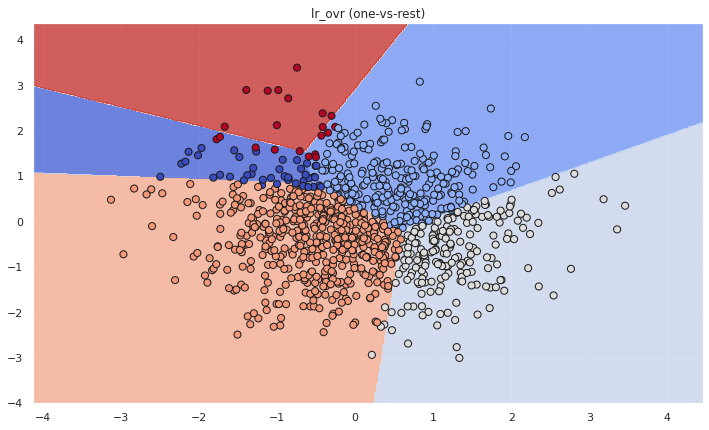

In [56]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    fig, ax = plt.subplots(figsize=(12, 7))
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

lr_ovr = LogisticRegression(max_iter=9999)
lr_ovr.fit(X, y)

plot_classifier(X, y, lr_ovr)
plt.title('lr_ovr (one-vs-rest)')
plt.show()


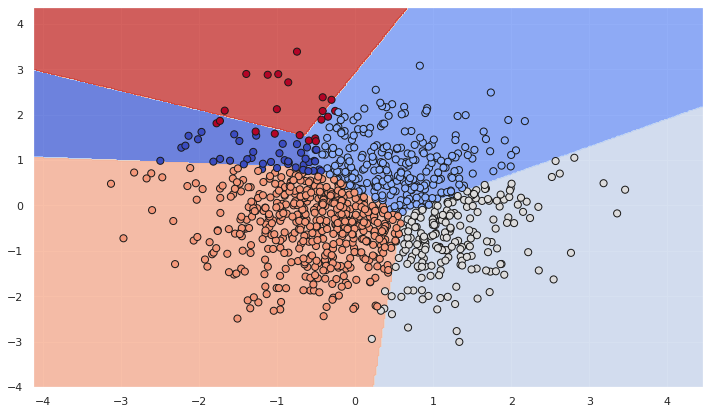

In [57]:
lr_mn = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=9999)
lr_mn.fit(X, y)

plot_classifier(X, y, lr_ovr)
plt.show()

## ***เหมือนกันเป๊ะ เวอร์ชั่นหลังๆ น่าจะไม่ได้แยกความแตกต่าง***

### ***Support vector definition***

Which of the following is a true statement about support vectors? To help you out, here's the picture of support vectors (top), as well as the hinge loss (bottom).

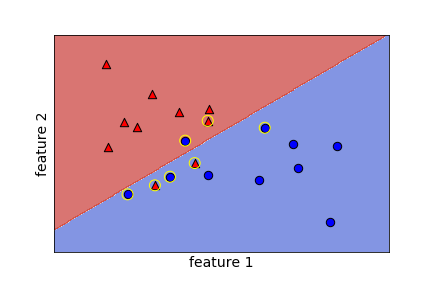

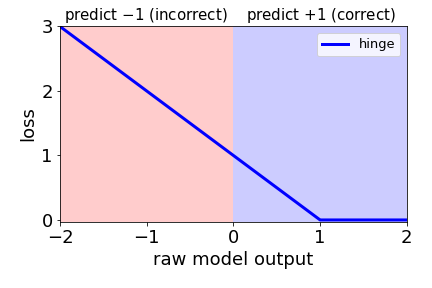

## ***All INCORRECTLY classified points are support vectors.***

### ***Effect of removing examples***

Support vectors are defined as training examples that influence the decision boundary. Observe this behavior by removing non support vectors from the training set.

The wine quality dataset is already loaded into `X` and `y` (first two features only). (Note: we specify `lims` in `plot_classifier()` so that the two plots are forced to use the same axis limits and can be compared directly.)

* Train a linear SVM on the whole data set.
* Create a new data set containing only the support vectors.
* Train a new linear SVM on the smaller data set.

In [7]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

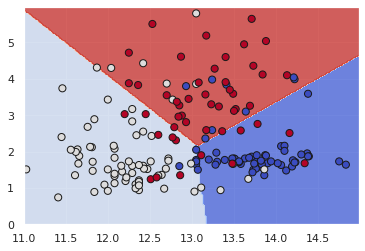

Number of original examples 178
Number of support vectors 81


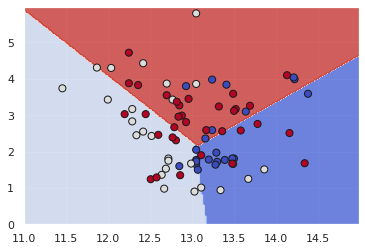

In [9]:
import sklearn.datasets

wine = sklearn.datasets.load_wine()
X, y = wine.data[:, :2], wine.target

# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))
plt.show()

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))
plt.show()

Compare the decision boundaries of the two trained models: are they the same? By the definition of support vectors, they should be!

# ***Nonlinear Boundaries***

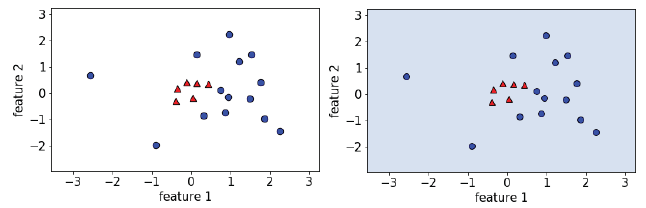

* ถ้าใช้ Linear Classifier อาจจะกลายเป็นพยากรณ์ทุกค่าสังเกตเป็นสีฟ้าทุกตัว !
* แต่ให้สังเกตว่า ชุดข้อมูลสีแดงๆนั้น จะอยู่ใกล้จุด (0, 0)
* *แต่ถ้าเราทำการ transform ข้อมูลเสียก่อน* เช่น ยกกำลังสอง จะทำให้ค่าที่อยู่ใกล้จุด (0, 0) เล็กลง และค่าอื่นๆห่างออกไป ดังรูป

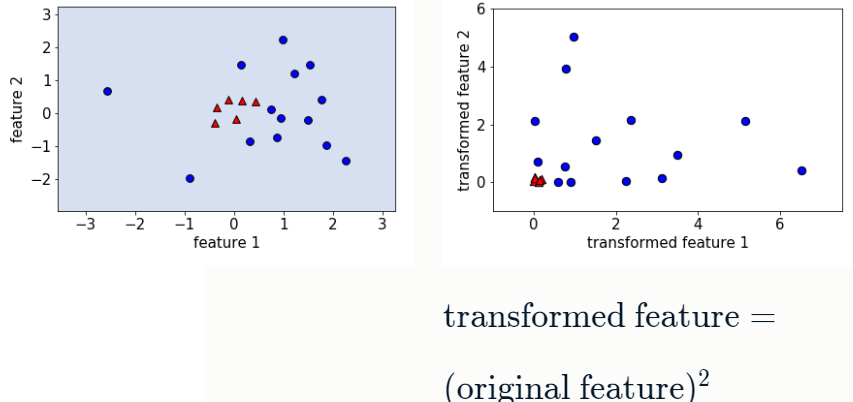

* จะเห็นได้ว่า ในกรณีนี้ เราสามารถใช้ linear svm ได้แล้ว

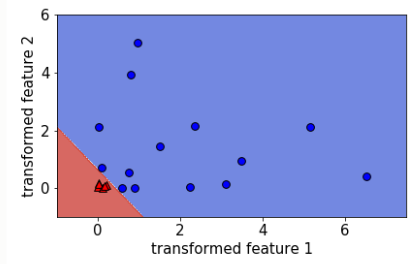

* ว่าแต่ รูปร่างของ ขอบ ในชุดข้อมูลก่อน transform หน้าตาเป็นอย่างไร

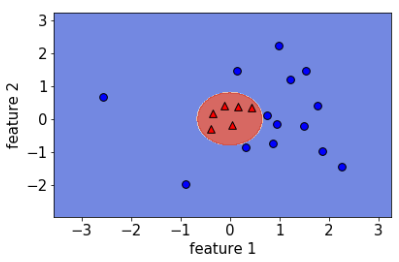

# ***Kernel SVMs***

* ใช้ feature transformation 

In [7]:
from sklearn.svm import SVC

svm = SVC(gamma=1) # default is kernel="rbf"

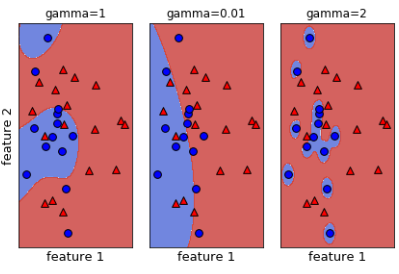

* With the right parameters RBF SVMs are able to perfectly separate almost any dataset, but this leads to overfitting.

### ***GridSearchCV warm-up*** (ไม่รู้ว่ามันแบ่งข้อมูลแบบไหน เลยเอามาหมด)

Increasing the RBF kernel hyperparameter gamma increases training accuracy. Search for the gamma that maximizes cross-validation accuracy using scikit-learn's **`GridSearchCV`**. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables `X` and `y`.

* Create a **`GridSearchCV`** object.
* Call the **`.fit()`** method to select the best value of gamma based on cross-validation accuracy.

In [17]:
import sklearn.datasets
from sklearn.model_selection import GridSearchCV

digits = sklearn.datasets.load_digits()
X, y = digits.data, digits.target
y = y==2

# Instantiate an RBF SVM
svm = SVC(max_iter=99999)

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)


Best CV params {'gamma': 0.001}


Larger values of gamma are better for training accuracy, but cross-validation helped us find something different (and better!).

### ***Jointly tuning gamma and C with GridSearchCV***

In the above exercise the best value of **`gamma`** was `0.001` using the default value of **`C`**, which is 1. Search for the best combination of **`C`** and **`gamma`** using **`GridSearchCV`**.

As in the above exercise, the 2-vs-not-2 digits dataset is already loaded, but this time it's split into the variables `X_train`, `y_train`, `X_test`, and `y_test`. Even though cross-validation already splits the training set into parts, it's often a good idea to hold out a separate test set to make sure the cross-validation results are sensible.

* Run **`GridSearchCV`** to find the best hyperparameters using the training set.
* Print the best values of the parameters.
* Print out the accuracy on the test set, which was not used during the cross-validation procedure.

In [23]:
import sklearn.datasets
from sklearn.model_selection import GridSearchCV

digits = sklearn.datasets.load_digits()
X, y = digits.data, digits.target
y = y==2
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, stratify=y, random_state=42)

# Instantiate an RBF SVM
svm = SVC(max_iter=99999)

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.9877467411545624
Test accuracy of best grid search hypers: 0.985539488320356


Note that the best value of gamma, 0.0001 (บนดาต้าแคมพ์) , is different from the value of 0.001 that we got in the previous exercise, when we fixed C=1. Hyperparameters can affect each other! 

* จริงๆเชื่อไม่ได้ เพราะขนาดตัวอย่างในสองแบบฝึกหัดนี้ต่างกัน

# ***Logistic Regression Hyperparameters (most frequent)***

* **`C`** (inverse regularization strength ค่าตัวเลข ยิ่งค่าน้อย ยิ่งมี Regularization เยอะ)
* **`penalty`** (type of regularization L1 หรือ L2)
* **`multi_class`** (type of multi-class)

# ***SVM Hyperparameters (most frequent)***

* **`C`** (inverse regularization strength)
* **`kernel`** (type of kernel)
* **`gamma`** (inverse RBF smoothness)

# ***SGDClassifier***
* **`SGDClassifier`** : scales well to large datasets ==> LogisticRegression()
* **`SGDClassifier`** hyperparameter `alpha` is like `1/C` ==> LinearSVC()

In [ ]:
from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss='log')
linsvm = SGDClassifier(loss='hinge')

### ***Using SGDClassifier***

Do a hyperparameter search over the regularization type, regularization strength, and the loss (logistic regression vs. linear SVM) using **`SGDClassifier()`**.

* Instantiate an **`SGDClassifier`** instance with `random_state=0`.
* Search over the regularization strength, the **`hinge`** vs. **`log`** losses, and **`L1`** vs. **`L2`** regularization.

In [26]:
import sklearn.datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

digits = sklearn.datasets.load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, stratify=y, random_state=42)

##########################################################################

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0, max_iter=99999)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 1e-05, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.9570603174603175
Test accuracy of best grid search hypers: 0.9462962962962963


One advantage of **`SGDClassifier`** is that it's very fast - this would have taken a lot longer with **`LogisticRegression`** or **`LinearSVC`**.